In [2]:
import os
import os.path as osp
from multiprocessing import Pool
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image

In [4]:
inputdirs = ['Maps1_T', 'Maps2_T', 'Maps3_T', 'Maps4_T', 'Maps5_T', 'Maps6_T']
outputdir = 'Mask_test'

In [7]:
maskfiles = []
for i in ['D:/University/test/Train_imgs_croped']:
    maskfiles = maskfiles + os.listdir(i)
maskfiles = list(maskfiles)

In [8]:
len(maskfiles)

94992

In [ ]:
for file in maskfiles:
    image= np.array(Image.open(f'Mask/{file}'))
    # Kiểm tra xem ảnh có kích thước hợp lệ hay không

    window_size = 256  # Kích thước cửa sổ trượt
    # Duyệt qua các vùng của ảnh sử dụng cửa sổ trượt
    idx = 1
    for y in range(0, np.shape(image)[0] - window_size + 1, window_size):
        for x in range(0, np.shape(image)[1] - window_size + 1, window_size):
            small_image = image[y:y + window_size, x:x + window_size]
            Image.fromarray(small_image).save(f'Mask_test/{idx}_{file}')
            idx+=1

In [3]:
def m_voting(Imgs):
    sum_matrix = Imgs[0]
    for i in range(1, len(Imgs)):
        sum_matrix += Imgs[i]
    new_matrix = np.where(sum_matrix >= int(len(Imgs)*0.5), 4, 0)
    return new_matrix

In [4]:
def Majority_Voting(item, inputdirs, outputdir, undecidedlabel):
    print("processing {}".format(item))

    imgs = []
    for p in inputdirs:
        if osp.isfile(osp.join(p, item)):
            imgs.append(np.array(Image.open(osp.join(p, item))))

    result =  m_voting(imgs)
    
    p1_data = imgs[0].copy()
    result_data = result.copy()
    if undecidedlabel:
        result_data[result_data == 255] = undecidedlabel
        result_data[result_data == 6] = 2
    else:
        result_data[result_data == 255] = p1_data[result_data == 255]
        result_data[result_data == 6] = 2
    result = Image.fromarray(result_data)
    result.save(osp.join(outputdir, item))

In [5]:
maskfiles = []
for i in ['Maps1_T']:
    maskfiles = maskfiles + os.listdir(i)
maskfiles = list(maskfiles)

In [6]:
Majority_Voting(maskfiles[3], inputdirs, outputdir, None)

processing slide001_core006_classimg_nonconvex.png


In [9]:
i = np.array(Image.open('Maps1_T/slide001_core006_classimg_nonconvex.png'))
u,v = np.unique(i, return_counts=True)
print(u)
print(v)

[0 4]
[12047034 16788806]


In [11]:
i = np.array(Image.open('Maps2_T/slide001_core112_classimg_nonconvex.png'))
u,v = np.unique(i, return_counts=True)
print(u)
print(v)

[0 3 4]
[20812612   397355    23697]


In [10]:
i = np.array(Image.open('Mask_test/slide001_core006_classimg_nonconvex.png'))
u,v = np.unique(i, return_counts=True)
print(u)
print(v)

[0 4]
[ 9818350 19017490]


[0 1]
[ 9818350 19017490]


In [3]:
imgs = []

imgs.append(sitk.GetArrayFromImage(sitk.ReadImage(f'Train_imgs/slide001_core003.jpg')))
for p in ['Maps1_T', 'Maps2_T', 'Maps3_T', 'Maps4_T', 'Maps5_T', 'Maps6_T', 'Mask']:
    if osp.isfile(osp.join(p, f'slide001_core003_classimg_nonconvex.png')):
        imgs.append(sitk.GetArrayFromImage(sitk.ReadImage(osp.join(p, f'slide001_core003_classimg_nonconvex.png'))))

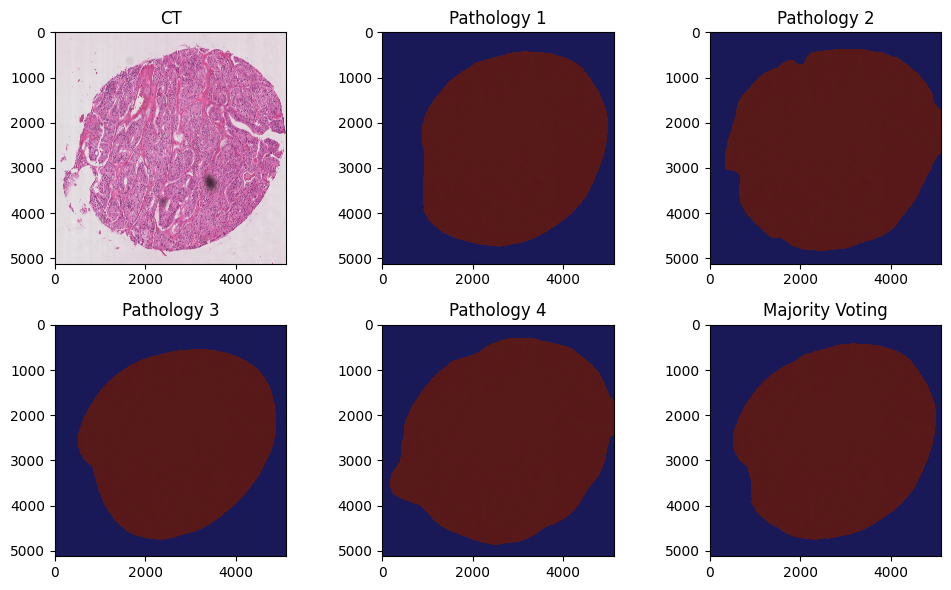

In [5]:
fig, axes  = plt.subplots(2, 3, figsize=(10, 6))

# Display the CT scan
axes[0, 0].set_title("CT")
axes[0, 0].imshow(np.rot90(np.clip(imgs[0], -350, 450), k=1), cmap='gray')


# Display segmentations from our three raters
def display_segmentation(ax, title, seg_image):
    ax.set_title(title)
    ax.imshow(np.rot90(np.clip(imgs[0], -350, 50), k=1), cmap='jet')
    ax.imshow(np.rot90(seg_image, k=1), cmap='jet', interpolation="none", alpha=0.5)


raters  = []
rater_names =[]
for idx, val in enumerate(imgs):
    if idx > 0 and val is not False:
        raters.append(val)
        if idx == len(imgs) - 1:
            rater_names.append(f'Majority Voting')
        else:
            rater_names.append(f'Pathology {idx}')

for i, ax in enumerate(axes.flatten()[1:]):
    display_segmentation(ax, rater_names[i], raters[i])

plt.subplots_adjust(wspace=0.3)  # Adjust the horizontal space between subplots
plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

In [7]:
a1 = np.array(Image.open('Maps1_T/slide001_core003_classimg_nonconvex.png'))
#a2 = np.array(Image.open('Maps2_T/slide001_core003_classimg_nonconvex.png'))
a3 = np.array(Image.open('Maps3_T/slide001_core003_classimg_nonconvex.png'))
a4 = np.array(Image.open('Maps4_T/slide001_core003_classimg_nonconvex.png'))
a5 = np.array(Image.open('Maps5_T/slide001_core003_classimg_nonconvex.png'))
#a6 = np.array(Image.open('Maps6_T/slide001_core003_classimg_nonconvex.png'))

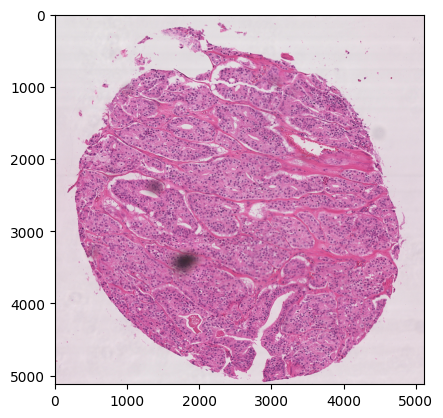

In [8]:
plt.imshow(Image.open('D:/University/Final_in_university/test_train/slide001_core003.jpg'))
plt.show()

In [10]:
i = 1000
j = 3700
print(a1[i][j])
print(a3[i][j])
print(a4[i][j])
print(a5[i][j])

0
4
0
4


In [14]:
from scipy.stats import mode

In [15]:
# Tạo ma trận mới kích thước tương tự
new_matrix = np.zeros_like(a1)

# Tìm giá trị xuất hiện nhiều nhất trong 3 ma trận tại mỗi vị trí pixel
max_mode, _ = mode([a1, a3, a4, a5], axis=0)
new_matrix = max_mode[0]
print(new_matrix[i][j])

KeyboardInterrupt: 